<a href="https://colab.research.google.com/github/RafaRomero8/Analisis-Exploratorio-EDA-/blob/master/Analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISIS EXPLORATORIO DE DATOS 



# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos después de hacer la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular") 
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Lectura del dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Lectura
ruta = "/content/drive/MyDrive/dataSets/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [5]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


#4. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión o adquirir el producto?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

##4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [6]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


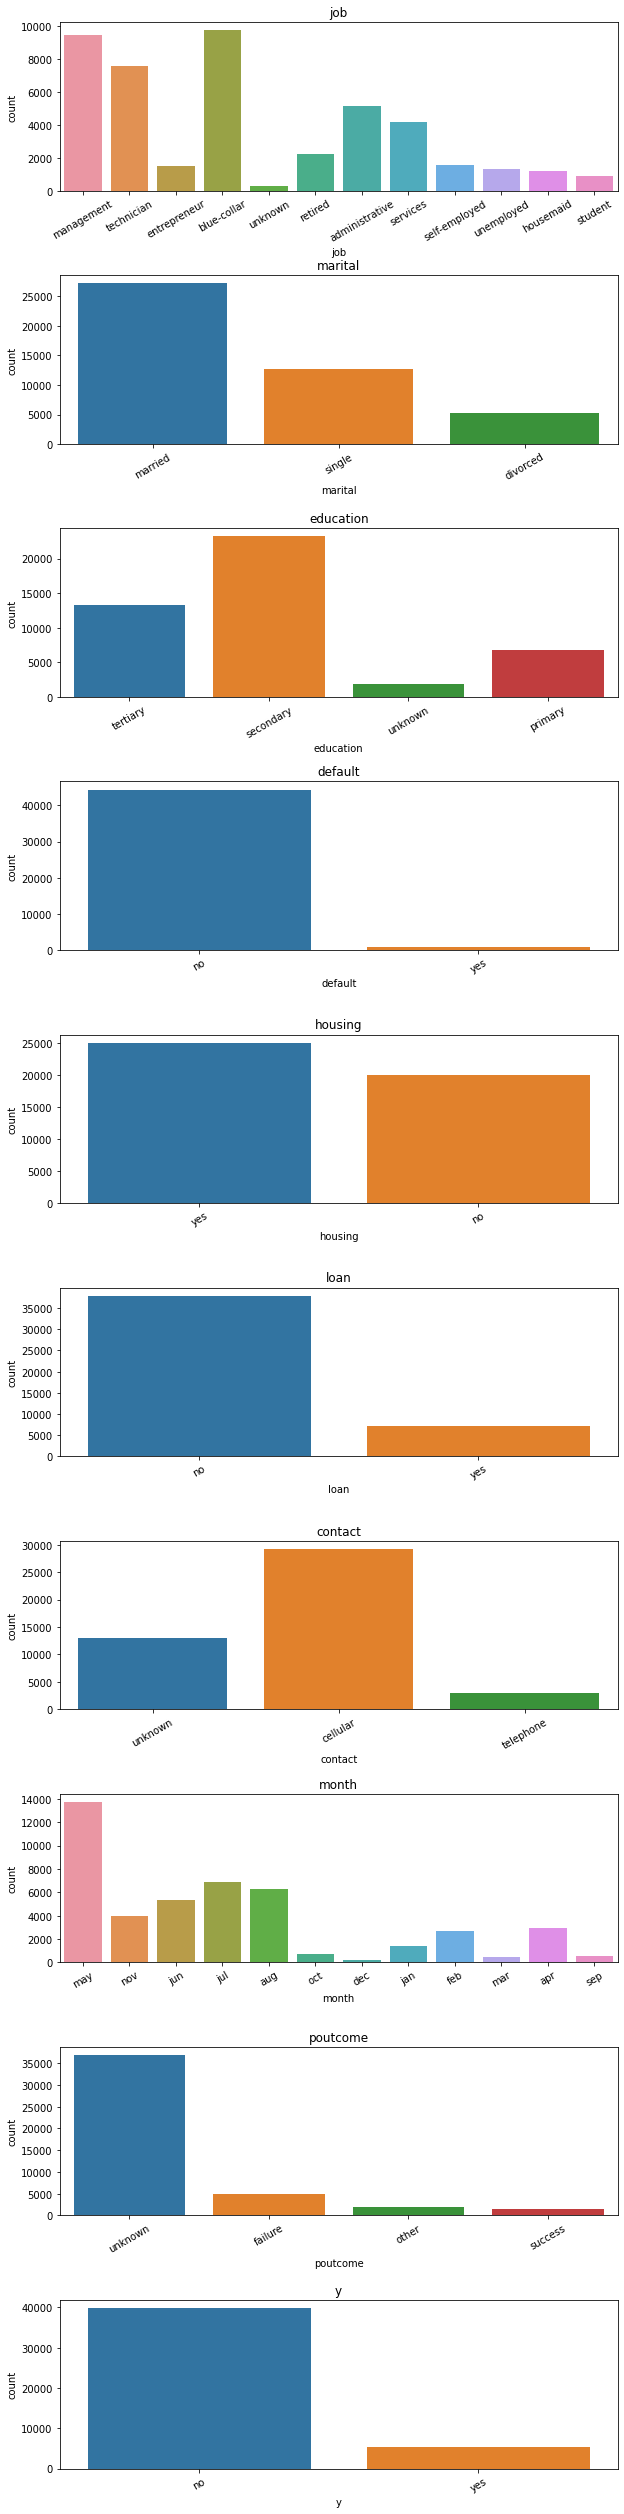

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])#cuenta las categorias 
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observaciones:**

Niveles de cada variable de interés:
- 'job': 12
- 'marital': 3 (married, single, divorced)
- 'education': 4 (primary, secondary, tertiary, unknown)
- 'default': 2 (Yes, No). En este caso la gran mayoría de contactados tienen valores 'No'
- 'housing': 2 (Yes, No). En este caso el set está relativamente balanceado.
- 'loan': 2 (Yes, No). En este caso la gran mayoría contiene valores 'No'.
- 'poutcome': 4 (unknown, failure, other, success). La gran mayoría está en el nivel 'unknown'
- 'y': 2 (No, Yes). La gran mayoría está en el nivel 'No'. Si mas adelante se implemente algún modelo predictivo con Machine Learning se debe tener en cuenta este desbalance.

In [ ]:
# Eliminemos las columnas "contact", "month", "day", "duration", "campaign",
# "pdays" y "previous" pues no aportan información sobre el cliente
#Pues para la pregunta que nos hemos echo al principio,es decir, el perfil de cliente
#que nos va adeterminar si tiene potencial o no de adquirir el producto,
#no son relevantes dichas columnas

data.drop(columns=['contact','month', 'day', 'duration', 'campaign', 'pdays',
                   'previous'],inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

Veamos inicialmente el comportamiento de las variables numéricas ('age' y 'balance')

In [ ]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


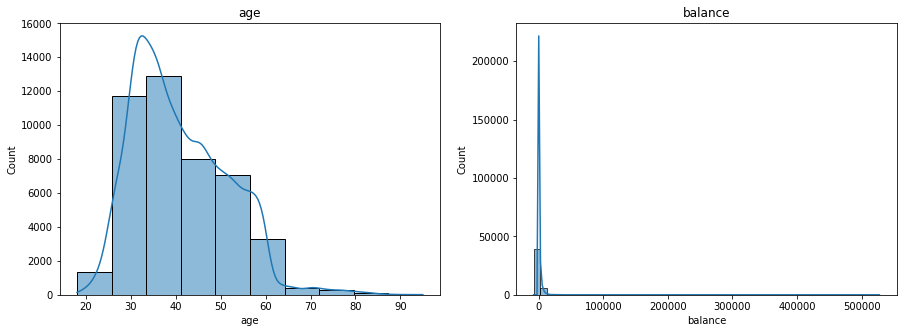

In [7]:
# Pero muchas veces es más útil graficar dichas variables

# Dibujar histogramas
col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)
    #Para la variable de la edad:la mayor parte eta entre los 25 hasta los 40 años de edad
    #Para la variable de balance:saldos entre los 1500 euros

In [ ]:
# Veamos en detalle lo que ocurre con balance
data['balance'].describe()
#Por ejemplo el 75% de las personas tenian un saldo menor los  1428 euros

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

**Observaciones:**

- La mayor parte del grupo contactado tiene edades entre los 30 y los 50 años, con sesgo hacia los 30-40 años
- La mayor parte del grupo contactado (75%) tiene saldos o negativos o que no superan los 1500 euros aproximadamente.

##4.2 Análisis univariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('age', 'balance', 'job', 'marital', 'education', etc.) y la variable a predecir ('y').

Esto se conoce como análisis univariado. 

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [8]:
# Comencemos representando la variable a predecir de forma binaria:
# 'yes' = 1, 'no' = 0
diccionario = {'yes':1, 'no':0}#para yes va hacer  1 y para no 0
binario = data['y'].map(diccionario)#hacer un mapeo ,donde aparezca yes coloque un 1 y 0 en no
data['y_bin'] = binario#columna nueva 

# De esta forma resulta fácil calcular la tasa de conversión: el promedio
# de la columna 'y_bin'

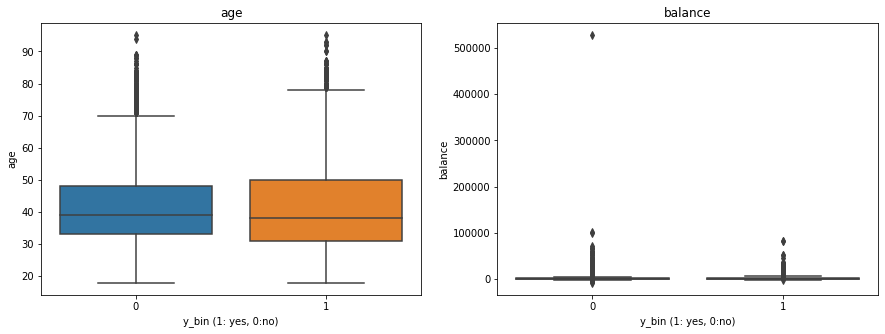

In [9]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('y')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="y_bin", y=col, data=data, ax=ax[i])
  ax[i].set_xlabel('y_bin (1: yes, 0:no)')
  ax[i].set_title(col)

**Observaciones:**
- Ni en 'age' ni en 'balance' se observan diferencias entre las personas que adquirieron o no el producto.
- Al parecer las variables numéricas no resultan en principio siendo variables predictivas.

Sin embargo estas variables numéricas se encuentran en un amplio rango.

Podemos calcular las tasas de conversión definiendo intervalos para estas variables numéricas y ver si podemos extraer información relevante de ese análisis:

In [10]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos (grafica tipo linea)
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

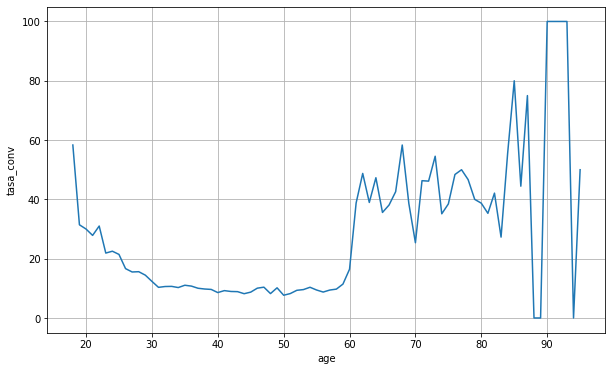

In [ ]:
# Y graficar las tasas de conversión para la variable edad
graficar_tasas_conversion('age','y_bin')#y_bin es la column que creamos 
#podemos ver en el eje xx las diferentes edades desde los 18 hasta los 95 años
#y en el eje y las tasas de conversión de 0  a 100,es decir el % de personas
#en cada una de las edades que adquirieron el producto
#Por ejemplo  a la edad de 25años hay una tasa de 20%
#entre lo 25 y 60  la tasa esta por debaj del 20%

#Podemos a comenzar a identificar ciertos patrones  en los datos
#y ciertos rango de edad entre la gente para los cuales hay un potencial de que las 
#personas adquieran el producto

**Observaciones:**

- En este caso SÍ se observan diferencias en las tasas de conversión por edad
- Podríamos establecer tres rangos aproximados: 18-25 años, 26-59 años y 60 años en adelante

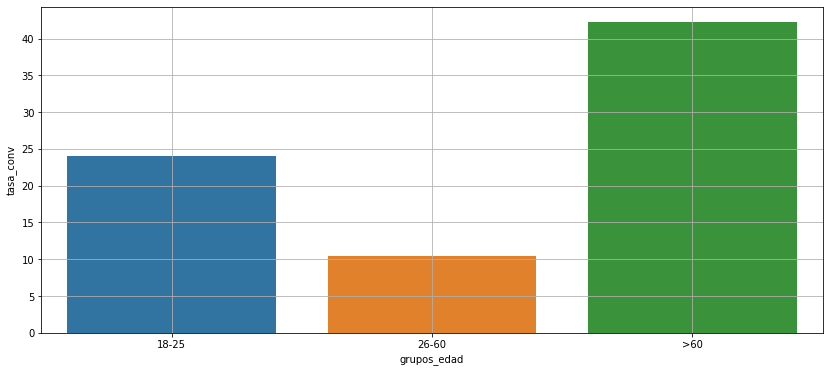

In [ ]:
# Creemos subbrupos de edades y calculemos las tasas de conversión en cada caso

# Nueva columna en el dataset: "grupos_edad"
data.loc[:,'grupos_edad'] = "18-25"#le ponemos etiqueta entre 18-25
data.loc[data['age']>60,'grupos_edad'] = ">60"#le ponemos etiqueta mayor a 60
data.loc[(data['age']>25)&(data['age']<=60), 'grupos_edad'] = "26-60"

# Y grafiquemos la tasa de conversión para esta nueva columna
#nuestra función hace una grafica de barras ya que tiene intervalos o rangos 
graficar_tasas_conversion('grupos_edad','y_bin',type='bar')

**Observaciones:**

- Tenemos 3 rangos de edad bastante diferenciados y para los cuales se alcanzan diferentes tasas de conversión: 18-25 años (24%), 26-60 años (11%), más de 60 años (43%)

In [11]:
# Y eliminemos la columna "age" (dejando sólo los grupos de edad)
data.drop(columns=['age'], inplace=True)

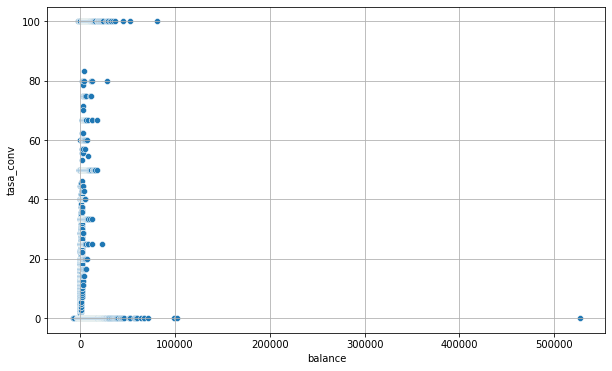

In [12]:
# Realicemos el mismo análisis pero para la variable 'balance'
graficar_tasas_conversion('balance','y_bin',type='scatter')

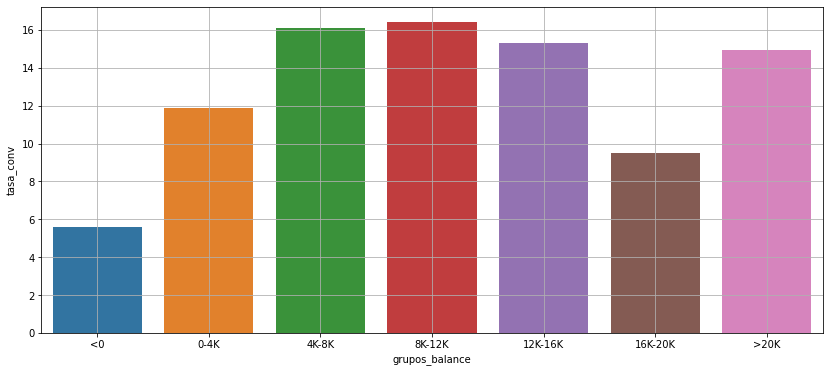

In [ ]:
# No resulta fácil ver un patrón. Al igual que con la edad generemos
# diferentes rangos:
# <0
# 0-4000
# 4000-8000
# 8000-12000
# 12000-16000
# 16000-20000
# >20000

# Nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupos_balance'] = "<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),'grupos_balance'] = "0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<8000),'grupos_balance'] = "4K-8K"
data.loc[(data['balance']>=8000) & (data['balance']<12000),'grupos_balance'] = "8K-12K"
data.loc[(data['balance']>=12000) & (data['balance']<16000),'grupos_balance'] = "12K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'grupos_balance'] = "16K-20K"
data.loc[data['balance']>=20000,'grupos_balance'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<0', '0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K', '>20K']
graficar_tasas_conversion('grupos_balance','y_bin',type='bar', order=orden)

**Observaciones:**

- Al parecer hay un patrón. Si organizamos las barras de forma ascendente observamos:
    - <0: 6%
    - 0-4K: 12%
    - 4K-8K: 16%
    - 8K-12K: 16%
    - 12K-16K: 15%
    - 16K-20K: 9%
    - Mayor a 20K: 15%

- Exceptuando el rango 16K-20K, en general un mayor nivel de liquidez genera una mayor tasa de conversión.
- Podríamos definir 4 rangos de interés para simplificar el análisis:
  - 0-4K
  - 4K-16K
  - 16K-20K
  - Mayor a 20K

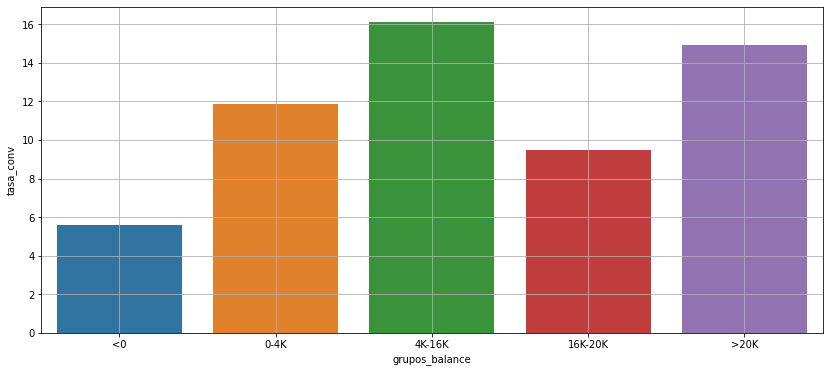

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

# Nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupos_balance'] = "<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),'grupos_balance'] = "0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<16000),'grupos_balance'] = "4K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'grupos_balance'] = "16K-20K"
data.loc[data['balance']>=20000,'grupos_balance'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
orden = ['<0','0-4K','4K-16K','16K-20K','>20K']
graficar_tasas_conversion('grupos_balance','y_bin',type='bar', order=orden)

In [ ]:
# Y eliminemos la columna "balance"
data.drop(columns=['balance'], inplace=True)

Ahora realizaremos un análisis similar pero para las variables categóricas:

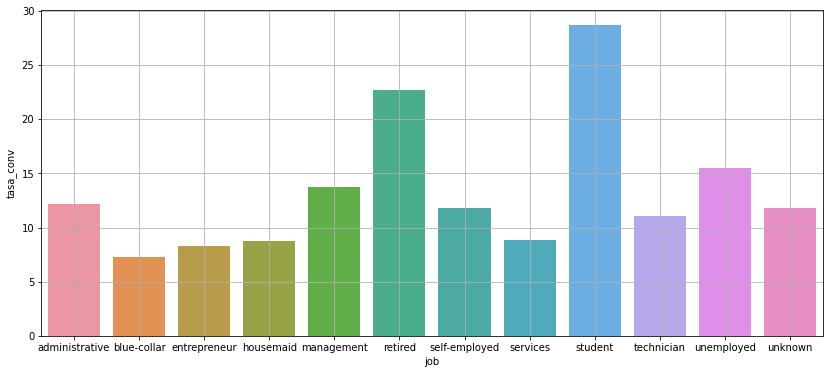

In [ ]:
graficar_tasas_conversion('job', 'y_bin', type='bar')

**Observaciones:**

- Las tasas de conversión oscilan entre 8% y 28% aproximadamente
- Los trabajos "retired" y "student" tienen las tasas de conversión más altas (23% y 28%)
- "Job" podría ser una variable predictora

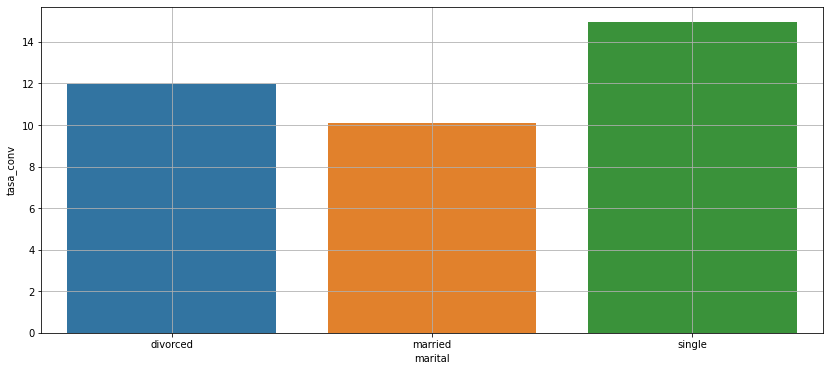

In [ ]:
# Marital
graficar_tasas_conversion('marital','y_bin',type='bar')

**Observaciones:**

- Las tasas de conversión son muy similares para los diferentes niveles en la variable "marital"
- "Marital" parece no ser una variable predictora

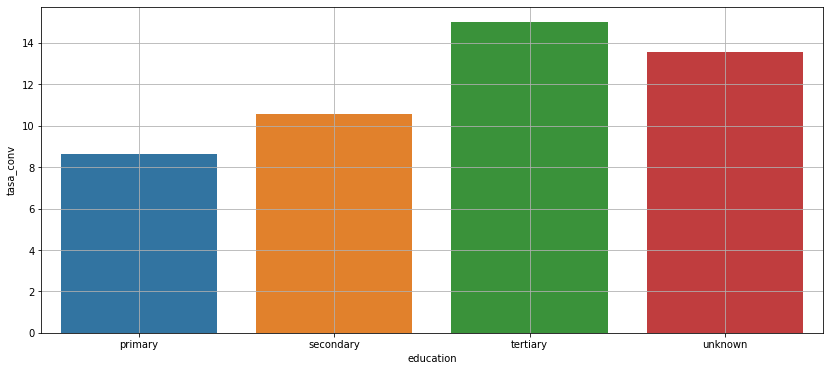

In [ ]:
# education
graficar_tasas_conversion('education','y_bin',type='bar')

**Observaciones:**

- Hay un ligero incremento en la tasa de conversión a medida que aumenta el nivel educativo.
- "Education" podría ser una variable predictora

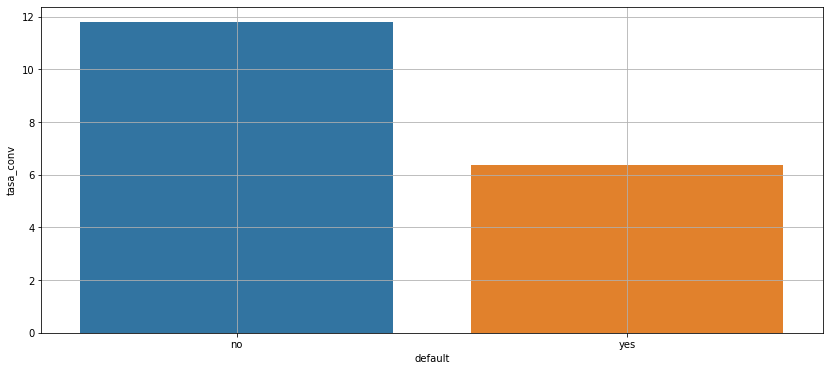

In [ ]:
# default
graficar_tasas_conversion('default','y_bin',type='bar')

**Observaciones**:

- Las tasas de conversión para quienes no tienen "default" son de casi el doble para quienes sí lo tienen (12% vs. 6% aproximadamente).
- "Default" podría ser una variable predictora

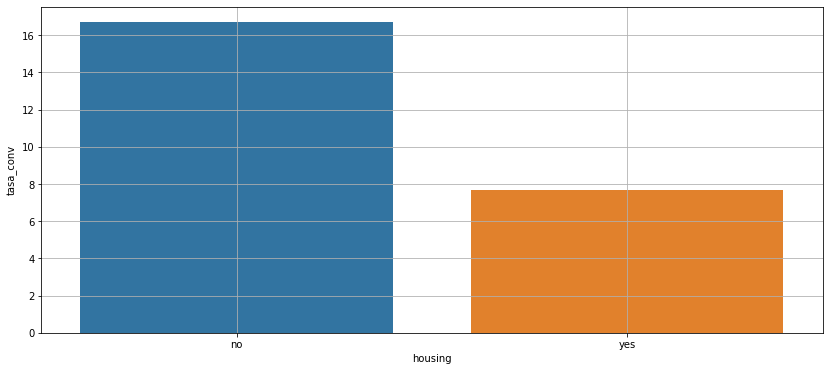

In [ ]:
# housing
graficar_tasas_conversion('housing','y_bin',type='bar')

**Observaciones:**

- Quienes no tienen crédito hipotecario ("housing"=no) definitivamente tienen mayores tasas de conversión.
- "Housing" es una variable predictora.

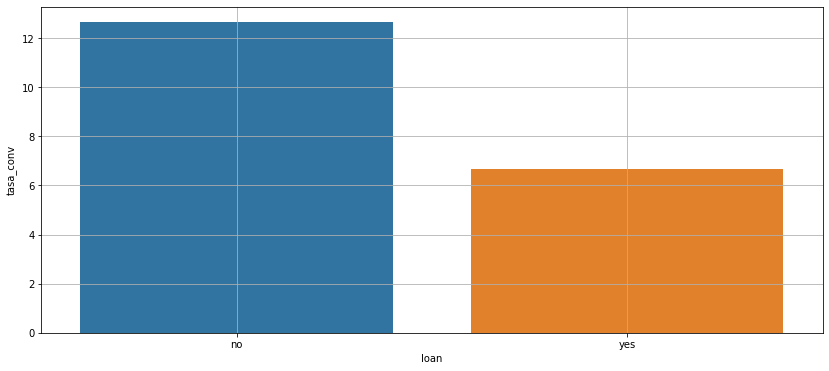

In [ ]:
# loan
graficar_tasas_conversion('loan','y_bin',type='bar')

**Observaciones:**

- Con "loan" ocurre algo similar a "housing": quienes NO tienen créditos de consumo presentan definitivamente mayores tasas de conversión
- "Loan" es una variable predictora

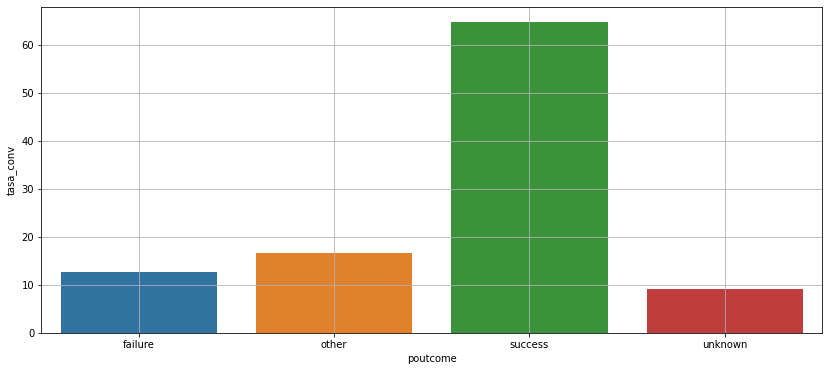

In [ ]:
# poutcome
graficar_tasas_conversion('poutcome','y_bin',type='bar')

**Observaciones:**

- Si el cliente adquirió un producto en la campaña anterior (poutcome = success) es más probable que adquiera este nuevo producto con el banco
- poutcome definitivamente es una variable predictora

### Resumen

Las variables predictoras con mayor impacto en la tasa de conversión parecen ser, en orden de importancia

1. poutcome: casi 70% de conversión para el nivel "success"
2. job: con tasas de 22% y 28% para 'retired' y 'student'
2. grupos_balance y grupos_edad, con tasas de conversión cercanas al 16% para varios intervalos
3. default, housing y loan con tasas de conversión entre 12% y 16% para los niveles "no"
4. marital y education, con niveles de conversión comparables con default, housing y loan.

##4.3 Análisis bivariado

Y podemos ir un paso más allá en este análisis exploratorio y analizar posibles interacciones entre pares de variables predictoras y su impacto en la variable a predecir.

Esto se conoce como análisis bivariado.

Como existen muchas posibles combinaciones analizaremos únicamente los pares con mayor potencial según el orden de importancia definido en el resumen del análisis univariado.

La forma más sencilla de hacer este análisis es a través de gráficas (aunque también se podrían usar herramientas estadísticas más sofisticadas).

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

De forma similar a como ocurre con el análisis univariado, este análisis nos mostrará sólo una faceta de las posibles relaciones entre pares de variables predictoras y la variable a predecir, y no es suficiente para extraer conclusiones definitivas (aunque nos dará una pista más detallada en comparación con el análisis univariado).

In [ ]:
# Tasa de conversión para dos columnas
def graficar_tc_bivariada(col_list, orden=None):
  tc = data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0,1));

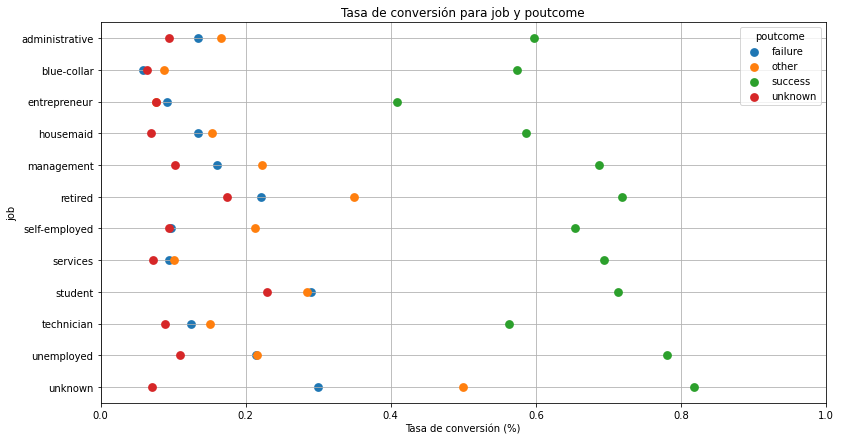

In [ ]:
# 1. Par poutcome-job
graficar_tc_bivariada(['job','poutcome'])

# Tasas de conversión superiores al 60% con poutcome==success y
# job = unemployed (78%), student/retired (72%), services (70%), 
# management (68%), self-employed (65%)

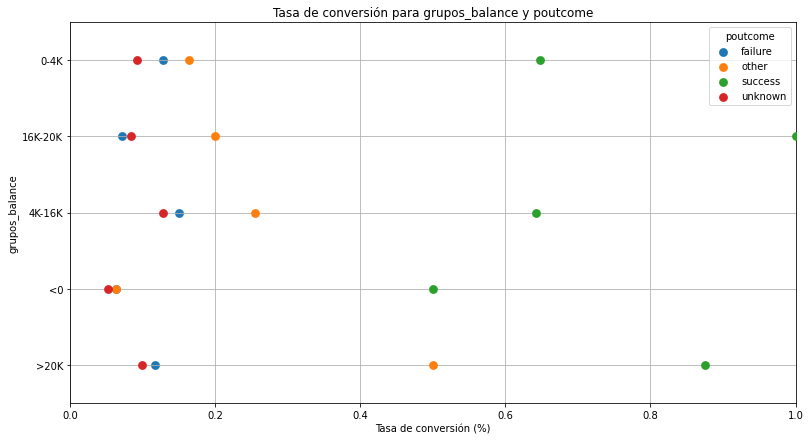

In [ ]:
#2. Par poutcome-grupos_balance
graficar_tc_bivariada(['grupos_balance','poutcome'])

# Tasas de conversión superiores al 60% para poutcome=success y
# - Ingresos entre 16K y 20K: 100%!!! Es interesante, pues al analizar sólo 
#   la variable ingresos en este rango se obtienen las menores tasas de conversión
# - Ingresos superiores a 20K: 88%
# - Ingresos entre 0-16K: 65%

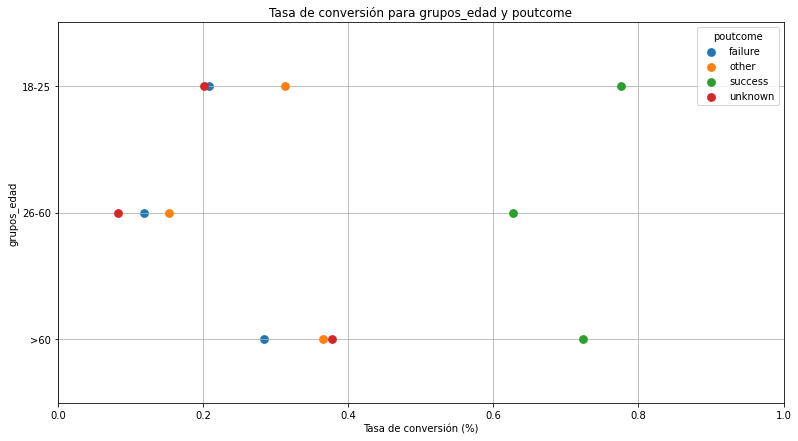

In [ ]:
#3. Par poutcome-grupos_edad
graficar_tc_bivariada(['grupos_edad','poutcome'])

# Tasas de conversión superiores al 60% para poutcome=success y
# - Edades 18-25: 78%
# - Edades >60: 72%
# - Edades 26-60: 62%

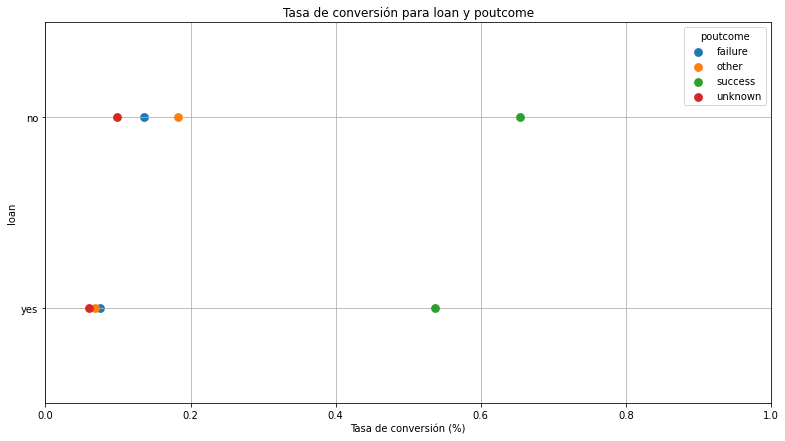

In [ ]:
#4. Pares poutcome + default/housing/loan
graficar_tc_bivariada(['loan','poutcome'])

# Se alcanzan tasas de conversión entre 60 y 65% para
# las combinaciones poutcome=success y default/housing/loan=no

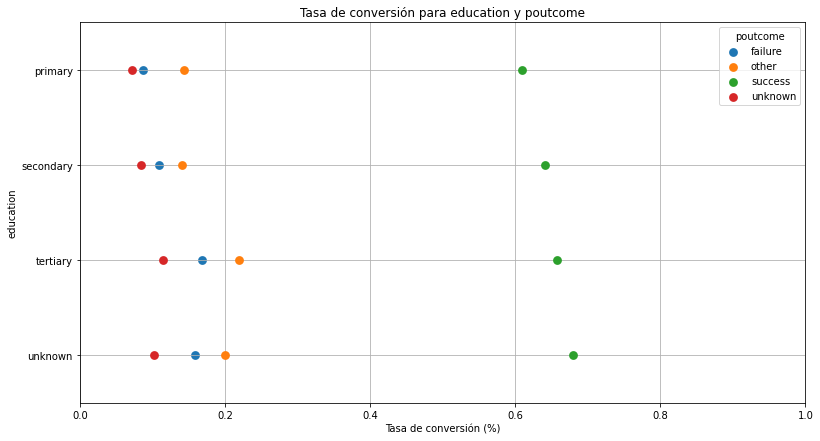

In [ ]:
#4. Pares poutcome + marital/education
graficar_tc_bivariada(['education','poutcome'])

# - Se alcanzan tasas de conversión entre 60 y 65% independientemente de "marital"
# - Y lo mismo para "education"

# Estas variables no resultan tan relevantes

# Conclusiones

- La variable "poutcome" seguida de las variables "job", "grupos_balance" y "grupos_edad" son las que tienen mayor impacto en la tasa de conversión.
- Con este análisis el perfil ideal de cliente sería:
    - Debe haber sido contactado previamente por el banco y debe haber adquirido previamente dicho producto (*poutcome == success*)
    - Perfil laboral (top-3): desempleado, estudiante, jubilado
    - Saldo en su cuenta bancaria: entre 16K y 20K (preferiblemente)
    - Edad: entre 18 y 25 años (preferiblemente)
    - Que NO cuente con crédito de consumo, crédito hipotecario o que no haya entrado en "default"


Es posible que la combinación de más de dos variables (análisis multivariado) arroje más luces sobre estos perfiles. Pero en este caso la interpretación de los resultados se dificulta a medida que analizamos de manera simultánea más y más variables.

En este punto el paso a seguir sería usar algún modelo de Machine Learning que permita encontrar esos patrones que no resultan fáciles de ver con este análisis exploratorio.